# Install libraries

In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.7 MB/s eta 0:00:00


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, constraints
from tensorflow.keras import models

from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, constraints
from tensorflow.keras import models
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import random
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, constraints
from tensorflow.keras import models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

DIRECTORY = "/content/drive/My Drive/yale/"

Mounted at /content/drive


# EDA
After importing the datset i first began by visualising the first three subjcts with two different poses (centerlight and sad), to better understand the images within.


**Subject01**

(243, 320, 3)


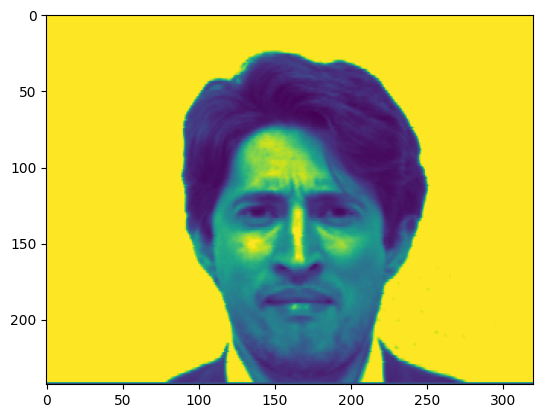

In [4]:
filename = "/content/drive/My Drive/yale/subject03.sad"
pixels = plt.imread(filename)
rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

# Data Processing

In [5]:
# Create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(rgb_pixels)

1/1 [==============================] - 0s 265ms/step


1/1 [==============================] - 1s 526ms/step


1/1 [==============================] - 0s 228ms/step


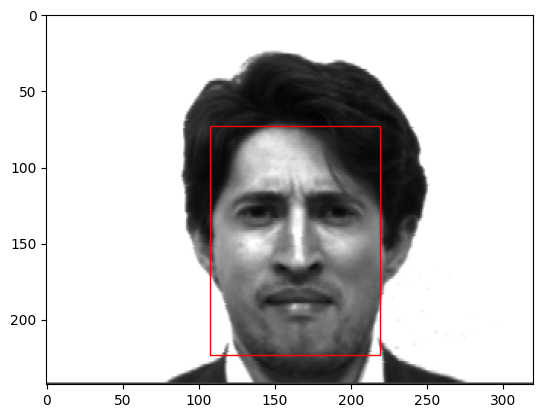

In [6]:
detector = MTCNN()

def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

results = detector.detect_faces(rgb_pixels)
draw_image_with_boxes(rgb_pixels, results)

def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    return gray_face

detector = MTCNN()

In [7]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

filenames = pd.DataFrame(list_files(DIRECTORY, "subject"))
df = filenames[0].str.split(".", expand=True)
df["filename"] = filenames
df = df.rename(columns={0: "subject", 1: "category"})
df['subject'] = df['subject'].str.replace('subject', '').str.strip().astype(int)
df = df.dropna()  # Drop any rows with missing subject information
df.reset_index(drop=True, inplace=True)  # Reset the DataFrame index

y = df['subject']
X = df.drop('subject', axis=1)
X_train_info, X_test_info, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=45, stratify=y)
y_train = y_train.tolist()
y_test = y_test.tolist()

def load_dataset(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY + filename
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

X_test = load_dataset(X_test_info)
X_train = load_dataset(X_train_info)

print(X_test.shape)
print(X_train.shape)

  0%|          | 0/33 [00:00<?, ?it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 1/33 [00:01<00:59,  1.85s/it]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 2/33 [00:03<00:52,  1.71s/it]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 3/33 [00:04<00:39,  1.32s/it]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 4/33 [00:05<00:32,  1.12s/it]

1/1 [==============================] - 0s 31ms/step


 15%|█▌        | 5/33 [00:05<00:28,  1.01s/it]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 6/33 [00:06<00:25,  1.04it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 7/33 [00:07<00:23,  1.11it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 8/33 [00:08<00:21,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 9/33 [00:09<00:20,  1.19it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 10/33 [00:10<00:21,  1.09it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 11/33 [00:11<00:22,  1.01s/it]

1/1 [==============================] - 0s 50ms/step


 36%|███▋      | 12/33 [00:12<00:22,  1.05s/it]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 13/33 [00:13<00:21,  1.05s/it]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 14/33 [00:14<00:19,  1.00s/it]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 15/33 [00:15<00:16,  1.06it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 16/33 [00:16<00:15,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 17/33 [00:16<00:13,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 18/33 [00:17<00:12,  1.17it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 19/33 [00:18<00:13,  1.06it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 20/33 [00:20<00:13,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 21/33 [00:21<00:13,  1.12s/it]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 22/33 [00:22<00:11,  1.07s/it]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 23/33 [00:23<00:09,  1.02it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 24/33 [00:24<00:09,  1.02s/it]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 25/33 [00:25<00:08,  1.07s/it]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 26/33 [00:26<00:07,  1.10s/it]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 27/33 [00:27<00:06,  1.07s/it]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 28/33 [00:28<00:04,  1.01it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 29/33 [00:29<00:03,  1.08it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 30/33 [00:30<00:02,  1.12it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 31/33 [00:30<00:01,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 32/33 [00:31<00:00,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 0/132 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 1/132 [00:00<01:48,  1.21it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 2/132 [00:01<01:43,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 3/132 [00:02<01:42,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 4/132 [00:03<01:43,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 5/132 [00:04<01:42,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 6/132 [00:04<01:41,  1.24it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 7/132 [00:05<01:55,  1.08it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 8/132 [00:07<02:00,  1.03it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 9/132 [00:08<02:08,  1.04s/it]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 10/132 [00:09<02:06,  1.04s/it]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 11/132 [00:10<01:57,  1.03it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 12/132 [00:10<01:50,  1.09it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 13/132 [00:11<01:45,  1.13it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 14/132 [00:12<01:41,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 15/132 [00:13<01:37,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 16/132 [00:14<01:37,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 17/132 [00:14<01:35,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▎        | 18/132 [00:15<01:33,  1.22it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 19/132 [00:16<01:31,  1.23it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 20/132 [00:17<01:30,  1.24it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 21/132 [00:18<01:28,  1.25it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 22/132 [00:18<01:27,  1.26it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 23/132 [00:20<01:37,  1.12it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 24/132 [00:21<01:43,  1.05it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 25/132 [00:22<01:48,  1.02s/it]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 26/132 [00:23<01:49,  1.03s/it]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 27/132 [00:24<01:40,  1.04it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 28/132 [00:24<01:34,  1.10it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 29/132 [00:25<01:29,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 30/132 [00:26<01:27,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 31/132 [00:27<01:24,  1.19it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 32/132 [00:28<01:22,  1.21it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 33/132 [00:28<01:20,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 34/132 [00:29<01:18,  1.24it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 35/132 [00:30<01:18,  1.24it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 36/132 [00:31<01:17,  1.24it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 37/132 [00:32<01:16,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 38/132 [00:32<01:16,  1.23it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 39/132 [00:34<01:22,  1.13it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 40/132 [00:35<01:31,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 41/132 [00:36<01:34,  1.04s/it]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 42/132 [00:37<01:34,  1.05s/it]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 43/132 [00:38<01:26,  1.03it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 44/132 [00:39<01:21,  1.08it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 45/132 [00:39<01:18,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 46/132 [00:40<01:14,  1.15it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 47/132 [00:41<01:13,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 48/132 [00:42<01:11,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 49/132 [00:43<01:12,  1.14it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 50/132 [00:44<01:10,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 51/132 [00:45<01:09,  1.17it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 52/132 [00:46<01:19,  1.01it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 53/132 [00:47<01:18,  1.01it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 54/132 [00:48<01:24,  1.08s/it]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 55/132 [00:49<01:27,  1.14s/it]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 56/132 [00:52<01:51,  1.46s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 57/132 [00:53<01:38,  1.31s/it]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 58/132 [00:54<01:28,  1.20s/it]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 59/132 [00:54<01:20,  1.11s/it]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 60/132 [00:55<01:14,  1.03s/it]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 61/132 [00:56<01:09,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 62/132 [00:57<01:04,  1.08it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 63/132 [00:58<01:01,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 64/132 [00:58<00:58,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 65/132 [00:59<00:56,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 66/132 [01:00<00:54,  1.21it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 67/132 [01:01<00:54,  1.20it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 68/132 [01:02<00:58,  1.09it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 69/132 [01:04<01:12,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 70/132 [01:05<01:12,  1.16s/it]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 71/132 [01:06<01:05,  1.08s/it]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 72/132 [01:07<00:59,  1.00it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 73/132 [01:07<00:55,  1.06it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 74/132 [01:08<00:53,  1.09it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 75/132 [01:09<00:51,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 76/132 [01:10<00:49,  1.13it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 77/132 [01:11<00:47,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 78/132 [01:12<00:46,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 79/132 [01:13<00:44,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 80/132 [01:13<00:43,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 81/132 [01:14<00:42,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 82/132 [01:15<00:41,  1.20it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 83/132 [01:16<00:44,  1.09it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▎   | 84/132 [01:17<00:47,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 85/132 [01:18<00:48,  1.04s/it]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 86/132 [01:19<00:48,  1.06s/it]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 87/132 [01:20<00:44,  1.01it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 88/132 [01:21<00:41,  1.06it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 89/132 [01:22<00:38,  1.11it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 90/132 [01:23<00:36,  1.14it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 91/132 [01:24<00:35,  1.15it/s]

1/1 [==============================] - 0s 130ms/step


 70%|██████▉   | 92/132 [01:25<00:42,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 93/132 [01:27<00:48,  1.25s/it]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 94/132 [01:28<00:43,  1.16s/it]

1/1 [==============================] - 0s 119ms/step


 72%|███████▏  | 95/132 [01:29<00:43,  1.18s/it]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 96/132 [01:30<00:42,  1.17s/it]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 97/132 [01:31<00:41,  1.17s/it]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 98/132 [01:33<00:39,  1.17s/it]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 99/132 [01:34<00:38,  1.17s/it]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 100/132 [01:35<00:34,  1.07s/it]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 101/132 [01:35<00:30,  1.01it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 102/132 [01:36<00:28,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 103/132 [01:37<00:25,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 104/132 [01:38<00:24,  1.14it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 105/132 [01:39<00:23,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 106/132 [01:39<00:22,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 107/132 [01:40<00:20,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 108/132 [01:41<00:20,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 109/132 [01:42<00:19,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 110/132 [01:43<00:18,  1.21it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 111/132 [01:44<00:17,  1.20it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 112/132 [01:45<00:18,  1.06it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 113/132 [01:46<00:19,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 114/132 [01:47<00:19,  1.07s/it]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 115/132 [01:48<00:18,  1.07s/it]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 116/132 [01:49<00:15,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 117/132 [01:50<00:14,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 118/132 [01:51<00:12,  1.10it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 119/132 [01:51<00:11,  1.13it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 120/132 [01:52<00:10,  1.15it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 121/132 [01:53<00:09,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 122/132 [01:54<00:08,  1.18it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 123/132 [01:55<00:07,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 124/132 [01:56<00:06,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 125/132 [01:57<00:05,  1.18it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 126/132 [01:57<00:05,  1.17it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 127/132 [01:58<00:04,  1.11it/s]

1/1 [==============================] - 0s 79ms/step


 97%|█████████▋| 128/132 [02:00<00:04,  1.10s/it]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 129/132 [02:01<00:03,  1.21s/it]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 130/132 [02:03<00:02,  1.28s/it]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 131/132 [02:04<00:01,  1.38s/it]

1/1 [==============================] - 0s 35ms/step


100%|██████████| 132/132 [02:06<00:00,  1.05it/s]

(33, 160, 160)
(132, 160, 160)


**For later use within algorithms we will create a dataframe of the datset**

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import random

In [9]:
in_encoder = Normalizer(norm='l2')
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
print('Reshaped X_train', X_train_reshaped.shape)
X_train_reshaped = in_encoder.transform(X_train_reshaped)

X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print('Reshaped X_test', X_test_reshaped.shape)
X_test_reshaped = in_encoder.transform(X_test_reshaped)

out_encoder = LabelEncoder()
out_encoder.fit(y_train)

model = SVC(kernel='linear', probability=True)
model.fit(X_train_reshaped, y_train)

yhat_train = model.predict(X_train_reshaped)
yhat_test = model.predict(X_test_reshaped)

score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))


Reshaped X_train (132, 25600)
Reshaped X_test (33, 25600)
Accuracy: train=80.303, test=72.727


Text(0.5, 36.72222222222221, 'X')

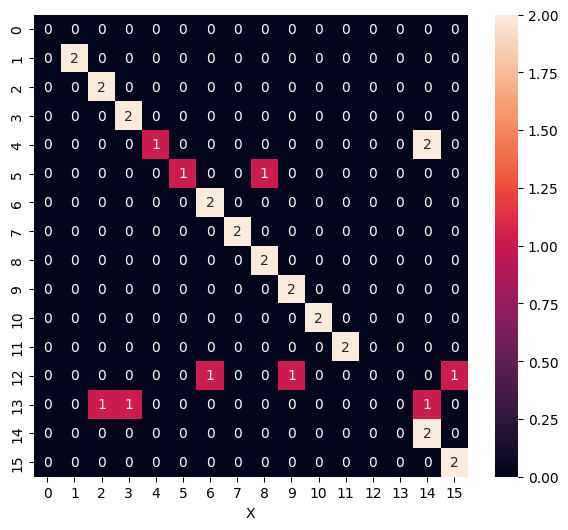

In [10]:
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=yhat_test)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')

In [11]:
in_encoder = Normalizer(norm='l2')
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
print('Reshaped X_train', X_train_reshaped.shape)
X_train_reshaped = in_encoder.transform(X_train_reshaped)

X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print('Reshaped X_test', X_test_reshaped.shape)
X_test_reshaped = in_encoder.transform(X_test_reshaped)

out_encoder = LabelEncoder()
out_encoder.fit(y_train)

model = SVC(kernel='linear', probability=True)
model.fit(X_train_reshaped, y_train)

yhat_train = model.predict(X_train_reshaped)
yhat_test = model.predict(X_test_reshaped)

score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Reshaped X_train (132, 25600)
Reshaped X_test (33, 25600)
Accuracy: train=80.303, test=72.727


In [12]:
# Score
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
# Summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=80.303, test=72.727


Text(0.5, 36.72222222222221, 'X')

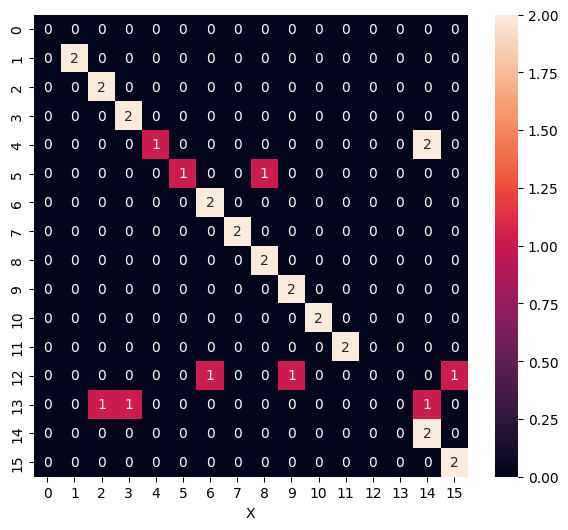

In [13]:
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=yhat_test)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')

# CNN

**Initialize parameters**

In [15]:
import os
width, height = 160, 160
num_epochs = 25
batch_size = 20
num_features = 64

import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

cnnmodel = models.Sequential()
cnnmodel.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(width, height, 1), padding='same'))
cnnmodel.add(MaxPooling2D((2, 2)))
cnnmodel.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))
cnnmodel.add(MCDropout(rate=0.5))
cnnmodel.add(Dense(15, activation='softmax', kernel_initializer="glorot_uniform"))

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    j = 0
    for label, gray_img in tqdm(data):
        j = (j % per_class) + 1
        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png", gray_img)

import shutil
shutil.rmtree(r'data', ignore_errors=True)
save_keras_dataset("test", X_test, y_test, 1)
save_keras_dataset("train", X_train, y_train, 9)


100%|██████████| 132/132 [00:00<00:00, 693.54it/s]


In [16]:
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,
    )

def add_noise(img):
    VARIABILITY = 35
    deviation = VARIABILITY * random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

**Define model**

In [18]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
from keras.preprocessing.image import ImageDataGenerator
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(width, height),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(width, height),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 132 images belonging to 15 classes.
Found 15 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 14s 2s/step - loss: 12.9439 - accuracy: 0.1339 - val_loss: 11.1031 - val_accuracy: 0.0667
Epoch 2/25
6/6 [==============================] - 8s 1s/step - loss: 10.0090 - accuracy: 0.1161 - val_loss: 8.8887 - val_accuracy: 0.0667
Epoch 3/25
6/6 [==============================] - 9s 1s/step - loss: 7.9954 - accuracy: 0.2143 - val_loss: 7.1906 - val_accuracy: 0.0667
Epoch 4/25
6/6 [==============================] - 10s 2s/step - loss: 6.4754 - accuracy: 0.2946 - val_loss: 5.8152 - val_accuracy: 0.4000
Epoch 5/25
6/6 [==============================] - 8s 1s/step - loss: 5.4093 - accuracy: 0.3571 - val_loss: 4.8644 - val_accuracy: 0.2000
Epoch 6/25
6/6 [==============================] - 8s 1s/step - loss: 4.5834 - accuracy: 0.4286 - val_loss: 4.3281 - val_accuracy: 0.5333
Epoch 7/25
6/6 [==============================] - 12s 2s/step - loss: 3.9021 - accuracy: 0.5446 - val_loss: 3.9382 - val_accuracy: 0.4667
Epoch 8/25
6/6 [==============================

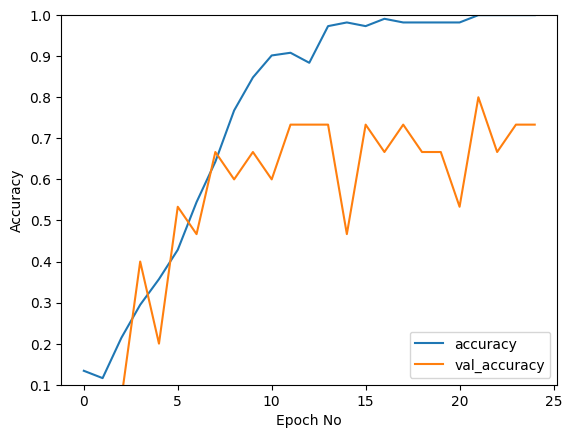

In [22]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

cnnmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=["accuracy"])

history = cnnmodel.fit(training_generator, steps_per_epoch=(120 // batch_size), epochs=num_epochs, validation_data=testing_generator, shuffle=True, validation_steps=(30 // batch_size))

plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch No')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

MODEL_NAME = "keras_face_recognition.h5"
model_path = "./model"
if not os.path.exists(model_path):
    os.mkdir(model_path)

**Save test/train datsets**

In [23]:
cnnmodel.save(os.path.join(model_path, MODEL_NAME))
class_names = training_generator.class_indices
class_names_file_reverse = MODEL_NAME[:-3] + "_class_names_reverse.npy"
class_names_file = MODEL_NAME[:-3] + "_class_names.npy"
np.save(os.path.join(model_path, class_names_file_reverse), class_names)
class_names_reversed = np.load(os.path.join(model_path, class_names_file_reverse), allow_pickle=True).item()
class_names = dict([(value, key) for key, value in class_names_reversed.items()])
np.save(os.path.join(model_path, class_names_file), class_names)

In [28]:
def get_sample_test_image():
    expected_class = random.randint(1, 15)
    random_sample = random.randint(1, 3)
    image_path = f"data/train/class_{expected_class}/class_{expected_class}_{random_sample}.png"
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img, expected_class

def preprocess_image(img):
    image = Image.fromarray(img)
    image = image.resize((160, 160))
    face_array = np.asarray(image)
    face_array = face_array.reshape(160, 160, 1)
    face_array = face_array.astype('float32')
    scaled_image = np.expand_dims(face_array, axis=0)
    return scaled_image

def prediction(image, debug=True):
    plt.imshow(image)
    plt.show()
    input_sample = preprocess_image(img)
    results = cnnmodel.predict(input_sample)
    result = np.argmax(results, axis=1)
    index = result[0]
    confidence = results[0][index] * 100
    classes = np.load(os.path.join("model", class_names_file), allow_pickle=True).item()
    if type(classes) is dict:
        for k, v in classes.items():
            if k == index:
                class_name = v
    if debug:
        print(results)
        print("Detected class is {} with {:.2f}% confidence".format(class_name, round(confidence, 2)))
    return class_name, confidence
THRESHOLD = 90

ALLOWED_USERS = ["class_1", "class_2", "class_3", "class_4", "class_5"]
def authenticate(img, debug=False):
    class_name, confidence = prediction(img, debug)
    if (confidence < THRESHOLD):
        print("Face not recognized")
    elif (class_name in ALLOWED_USERS):
        print("Access Granted for {}".format(class_name))
    else:
        print("You are not permitted. Detected class: {}, Confidence: {:.2f}%".format(class_name, round(confidence, 2)))


expected class 7


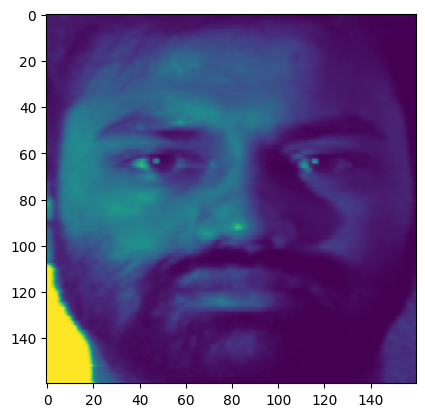

1/1 [==============================] - 0s 160ms/step
You are not permitted. Detected class: class_7, Confidence: 100.00%


In [29]:
img, expected_class = get_sample_test_image()
print(f"expected class {expected_class}")

authenticate(img)